In [1]:
import numpy as np
import matplotlib.image as pimg
import matplotlib.pyplot as plot
import cv2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

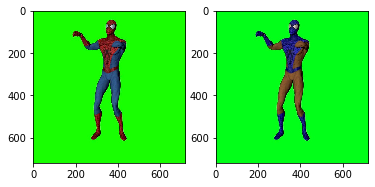

In [29]:
image_cv = cv2.imread(r"C:\Users\prave\CV ND\spiderman_green_bck.jpg")
image = pimg.imread(r"C:\Users\prave\CV ND\spiderman_green_bck.jpg")
plot.subplot(1,2,1)
plot.imshow(image)

plot.subplot(1,2,2)
plot.imshow(image_cv)

# Open CV reads the image in BGR format, and pyplot treats [B,G,R] as [R,G,B]. Hence, we gotta convert the color coding format
# to RGB to plot it correctly as we see

In [30]:
image.shape

(719, 719, 3)

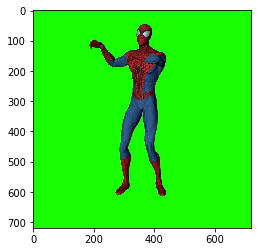

In [31]:
image_cv_new = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
plot.imshow(image_cv_new)

<h3> Define Threshold</h3>

In [32]:
image[10,10]

# define the region to hide by creating mask, the mask needs to highloght the areas of specific color intensity. 
#That spatial area will be hidden from our original image
low_threshold = np.array([0,240,0])
upper_threshold = np.array([50,255,10])


array([ 24, 255,   1], dtype=uint8)

<h3>Create a mask</h3>

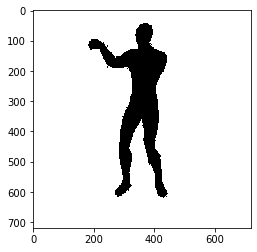

In [33]:
mask = cv2.inRange(image_cv_new, low_threshold, upper_threshold)
# 'inRange' function takes in an image and a range or values, if the pixel intensity falls in that range, 
# it highlights that pixel with logical 1 or intensity 255
plot.imshow(mask, cmap='gray')


In [35]:
mask[10,10]
mask[200,350]

255

0

In [36]:
img_pick = np.copy(image_cv_new)

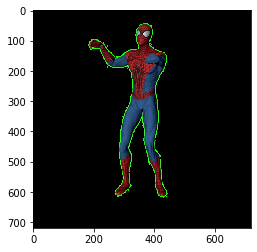

In [39]:
img_pick[mask == 255] = [0,0,0]
plot.imshow(img_pick, cmap='gray')

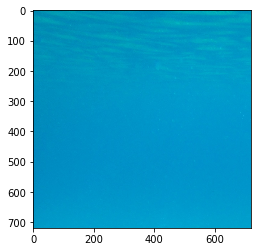

In [41]:
background = cv2.imread(r"C:\Users\prave\CV ND\underwater-sea-background.jpg")
background_resize = background[0:719, 0:719]
background_resize = cv2.cvtColor(background_resize, cv2.COLOR_BGR2RGB)
plot.imshow(background_resize)


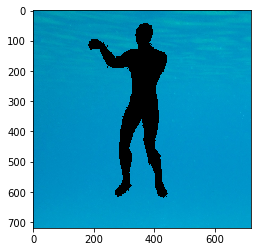

In [42]:
img_back = np.copy(background_resize)
img_back[mask == 0] = [0,0,0]
plot.imshow(img_back)

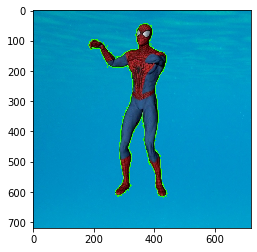

In [44]:
surreal_image = img_pick+img_back
plot.imshow(surreal_image)